# Colormaps

Welcome!



*Reminder: click in a code cell and type shift+return (shift+enter on a PC) to run a code cell.*


In this chapter of Next Steps in Python, we will learn the basics of colormaps: what they are, how to use them, some best practice tips, and how to create your own.

Colormaps may seem at first sight a secondary, ornamental issue. However, when presenting complicated data, using colormaps appropriately is crucial for conveying the right information!

## What is a colormap?

**Working Definition 1:** A pre-specified set of colors for your visualizations!

Here is an example of a colormap. Its name is viridis:

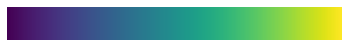

### Matplotlib Review

Colormaps are part of the `matplotlib` library. Hence, before we see them in action, let's take a quick refresher of matplotlib. [Here](https://matplotlib.org/stable/_images/anatomy.png) is their own illustration of a figure's anatomy.

OK, now let us declare the necessary imports for this workshop:

In [ ]:
# Imports

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import ListedColormap
import numpy as np

## Why do we need colormaps? A case example

Imagine you have a dataset in the form of sinusoidal wave signals, shifted by some phase $\phi$. Our goal is to visualize these signals.

**NOTE:** You don't need to "follow the math" to learn about colormaps. You can imagine the `x` and the `y` below are data at your disposal

In [ ]:
# Let's start by creating a simple sinusoidal wave:

k = 3/4
x = np.linspace(0, k*2*np.pi, num=200) # <-- x points between 0 and 3pi/2
y = np.sin(x)

Now we create a figure and axes object, and plot:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y)

Remember that I can specify the color using the parameter `c`:

In [ ]:
fig, ax = plt.subplots() # In google colab it is easier to declare a new figure
ax.plot(x,y, c = "purple")

In a moment we will plot curves with a different phase, so let me label this one:

In [ ]:
fig, ax = plt.subplots()
ax.plot(x,y, c = "purple", label = r"$\phi = 0$")
ax.legend()

#### **Exercise**

Plot two more sinusoidal waves that are off by $\pi$/4 and $\pi$/2. Remember a wave with a $\phi$ phase offset has the form: $sin(x + \phi)$.

Specify the color of the curves so you can differentiate among different values of $\phi$.

Hint: you can use `np.pi` for the constant $\pi$.

<br><br><br>

## Many waves:


OK, now let's see what happens when we plot many waves with different phases:

In [ ]:
fig, ax = plt.subplots()
phi_vec = np.linspace(0,np.pi, num=50)
for phi in phi_vec:
  y = np.sin(x + phi)
  ax.plot(x,y)

The figure is now cumbersome, how can we keep track of the phase?

Some things to note:
1.   The colors don't give a sense of the phase
2.   Eventually we run out of colors and recycle them!

While it is unlikely you will plot so many lines in a figure, there are instances where color is crucial for understanding data, for example heatmaps and scatterplots. We will get back to these soon.

## Enter colormaps

As mentioned, colormaps are sets of colors that can help us make sense of data. In a minute we will expand on them, but first let's quickly use one for the plot above:

In [ ]:
cm = mpl.colormaps["Purples"]

fig, ax = plt.subplots()
phi_vec = np.linspace(0,np.pi, num=50) # <-- try with num=100 also
for phi in phi_vec:
  y = np.sin(x + phi)
  ax.plot(x,y, c = cm(phi/np.pi))

See how easy it is to keep track of the individual waves and the phase!

#### **Exercise**

Repeat the above but using the colormap named "viridis".

<br><br><br><br><br>

## Using colormaps

With the above colormap, I don't need a ton of labels for each curve, I can convey my message with a colorbar (we'll get to those also):

In [ ]:
cm = mpl.colormaps["Purples"]

fig, ax = plt.subplots()
for phi in phi_vec:
  y = np.sin(x + phi)
  ax.plot(x,y, c = cm(phi/np.pi))

# Ignore these two lines for now (we will learn what they mean later)
norm = mpl.colors.Normalize(vmin=0, vmax=np.pi)
fig.colorbar(mpl.cm.ScalarMappable(cmap = "Purples", norm = norm), ax = ax, label = r"Phase $\phi$")

OK, so what did we do there?

First, we obtained the colormap called "Purples". This one is provided by matplotlib. You can get a colormap with `matplotlib.colormaps[<name>]`(note the square brackets).



How do you know which colormaps are available for you? You can consult the **list of colormaps**:

In [ ]:
# remember we imported colormaps
list(colormaps)

Let's take a look at them [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

Great, now, how do we access the individual colors of a colormap?

In [ ]:
cm = mpl.colormaps["viridis"]

cm(0)

The obtained colormap is a **callable** object, meaning you can "call" it with the parentheses (as you would with a function) and it will give you something in return.

In this case the argument is a number, and the output is an *RGBA value* representing a color.

**RGBA:** red, green blue, alpha (transparency).

In [ ]:
fig,ax = plt.subplots()
ax.plot(x,x, c = cm(0))
ax.plot(x,x+1, c = cm(.5))
ax.plot(x, x+2, c = cm(.99))

Noticed I gave values between 0 and 1.

This brings us to a second definition of a colormap:

**Definition 2:** A colormap is a function from the interval $[0,1)$ to RGBA color space.

### Exercise

Plot a five different lines, as above, using colors from the colormap "inferno". Go back to the color [reference](https://matplotlib.org/stable/gallery/color/colormap_reference.html) and see how the fraction you use for the color corresponds to the position in the colormap.

<br><br><br><br><br>

Let's revisit our code above, and note how I used the colormap to indicate the curve colors:

In [ ]:
cm = mpl.colormaps["viridis"]

fig, ax = plt.subplots()
phi_vec = np.linspace(0,np.pi, num=100)
for phi in phi_vec:
  y = np.sin(x + phi)
  ax.plot(x,y, c = cm(phi/np.pi)) # <-- This is where I call my colormap!

**Question:**

Why is the argument $\phi / \pi$ and not just $\phi$?

**Answer:**

The argument must be in $[0,1)$, so I've normalized it by the maximum value of $\phi$.

#### **Exercise**

What happens if we forget to normalize?

<br><br><br>

## Other plot types

In line plots, like the ones above, we need to specify individual colors with the `c` argument. However, other plots accept a full colormap as argument!

### Scatter plots
Let's first explore a **scatter plot** (the following example is adapted from matplotlib's documentation).

We start by creating our data. In reality you would have your own dataset, but here we will just make random points:

In [ ]:
# Let's create a scatterplot
np.random.seed(42)

n = 50
x = np.random.rand(n)
y = np.random.rand(n)

z = np.random.rand(n)

`z` is some variable you want to visualize through color. For example $(x,y)$ may be latitude and longitude and $z$ is the intensity of grazing activity of an animal species.

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x, y, c=z, s=200)

Notice we didn't indicate the colormap, but contrary to `plot`, it used "viridis" as default (plot uses "tab10").

We can change it though:

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x, y, c=z, s=200, cmap = "inferno")

We can generate an even better graph if we combine color with size, like this:

In [ ]:
area = (30 * z)**2
fig,ax = plt.subplots()
ax.scatter(x, y, c=z, s=area, cmap = "inferno")

<br>

OK, but since we sampled random numbers from $[0,1]$ we didn't have problems. What if our values are beyond that interval?

In [ ]:
# We will sample Zs outside [0,1]
np.random.seed(42)

n = 50
x = np.random.rand(n)
y = np.random.rand(n)

z = np.random.randn(n) # <-- sample from the normal distribution

In [ ]:
fig,ax = plt.subplots()
ax.scatter(x, y, c=z, s=200)

It still works! That's because `scatter` is smart enough to do the normalization for you.

### Heat maps

Let's explore another common matplotlib function: `imshow`. I've taken the "data" below from [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#sphx-glr-gallery-images-contours-and-fields-image-annotated-heatmap-py).

In [ ]:
data = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


In [ ]:
fig, ax = plt.subplots()
ax.imshow(data, cmap = "YlGn")

#### **Exercise**

Create a heatmap like the one above but using the colormap "tab10". Which one is easier to interpret?

<br><br><br><br><br>

## Choosing Colormaps
Great! Now let's take some time to talk about how to choose colormaps.

### Greyscale!
Personally, the first thing I like to consider when choosing colormaps is how they would look in grey scale. The rationale is that when others print your work, they will not usually print in color. You can find the greyscale version of default colormaps [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html#grayscale-conversion).

**Note:** Some journals require plots to be in greyscale!

### Color blindness and other visual defficiencies
There are colormaps made with color blindness in mind. You should consider these when preparing your plots for publication. For more on these, see [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html). For a list of third party colormaps, see [here](https://matplotlib.org/mpl-third-party/#colormaps-and-styles).

### Sequential colormaps
Sequential colormaps aim to be perceived as incrementally changing, both when seen in color and in greyscale. These are good choices when the property you want to describe through color is continuous or has more than a few differentiation levels.

### Diverging
When your data has a critical or middle point that must be emphasized.

### Cyclic
When your data is cyclic, like in our waves example!

### Qualitative
Used to describe data of different quality. Limit their use to data with a few categories. Note that in greyscale these are often difficult to differentiate.

I find qualitative colormaps particularly useful for paired barplots, like in the following example:

In [ ]:
cm = mpl.colormaps["Paired"]

pa_slices = [3, 7, 5]
npa_slices = [6, 5, 4]
x = np.arange(3)

w = .25
fig, ax = plt.subplots()

ax.bar(x, pa_slices, width = w, color = cm(0), label="Pineapple on pizza")
ax.bar(x+w, npa_slices, width = w, color = cm(1), label = "No Pineapple on pizza")

ax.set_title("Number of slices by region")
ax.set_xticks(x+w/2, labels=["Northwest", "West", "North"])
ax.legend()

For a further discussion on choosing colormaps see [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html#colormaps).

## Advanced topics

### Resampling

Sequential colormaps are appealing but often have much more differentiation than what we need. For example, say we need only 10 differentiation colors. What do we do?

We can **resample** our colormaps to obtain a smaller set.


In [ ]:
cm1 = mpl.colormaps["viridis"]
cm2 = cm1.resampled(10) # <-- Resampling

fig, ax = plt.subplots(2,1, figsize=(6, 1))
fig.colorbar(mpl.cm.ScalarMappable(cmap = cm1), cax = ax[0], orientation = "horizontal")
fig.colorbar(mpl.cm.ScalarMappable(cmap = cm2), cax = ax[1], orientation = "horizontal")

You can access the individual colors either by indexing or through the created subdivisions of the interval $[0,1)$.

In [ ]:
cm = mpl.colormaps["viridis"].resampled(10)
fig,ax = plt.subplots(1,2)
x = np.linspace(0,3,30)

dt = .1
for i in [0,2,4,6,8]:
  ax[0].plot(x,x+i, c = cm(i)) # <-- accessed with integer index
  ax[1].plot(x, x+i*10*dt, c=cm(i*dt)) # <-- accessed with fraction in [0,1)


### Colorbars and Normalization

OK, there is one mystery remaining: do you remember those colorbars I was making? What was that ScalarMappable argument about?

ScalarMappable objects help us map to color space when our data is not in the
 $\left[0,1\right)$ range. All they do is take some other range, call it $\left[a,b\right]$ (doesn't matter if it is closed or not) and map it to $\left[0,1\right)$ for us (this is called **Normalization**), and then map it into color space with the colormap.

 **ScalarMappble:**

 $\left[a,b\right] \;\; → \;\; \left[0,1\right) \;\; → \;\; RGBA$

Let's go back to out sinusoidal example. Our data region $[a,b] = [0,\phi]$. First we must map this to $\left[0,1\right)$. We do this through `Normalize`:

In [ ]:
norm = mpl.colors.Normalize(vmin=0, vmax=np.pi)

Now we can create our ScalarMappable:

In [ ]:
smap = mpl.cm.ScalarMappable(cmap = "Purples", norm = norm)

and use it for our colorbar:

In [ ]:
cm = mpl.colormaps["Purples"]

k = 3/4
x = np.linspace(0, k*2*np.pi, num=200)
phi_vec = np.linspace(0,np.pi, num=100)

fig, ax = plt.subplots()
for phi in phi_vec:
  y = np.sin(x + phi)
  ax.plot(x,y, c = cm(phi/np.pi))

fig.colorbar(smap, ax = ax, label = r"Phase $\phi$")

Not all normalization is linear. Some times you need logarithmic and other types of normalization. To learn more about it, see [here](https://matplotlib.org/stable/users/explain/colors/colormapnorms.html).

#### Automatic normalization

Note: We don't always have to build our ScalarMappable manually. Some matplotlib functions are smart enough to do it for you, for example `scatter` and `imshow`.

In [ ]:
np.random.seed(42)

n = 50
x = np.random.rand(n)
y = np.random.rand(n)
colors = np.random.rand(n)
area = (30 * colors)**2

fig,ax = plt.subplots()
scat = ax.scatter(x, y, c=colors, s=area)

fig.colorbar(scat)

### Creating your own colormaps!

The only remaining thing is learning how to make your own colormaps! This is not very difficult now that you know how colormaps work. All you need is a set of **normalized** RGBA values. Below is a simple example. For a more comprehensive guide see [here](https://matplotlib.org/stable/users/explain/colors/colormap-manipulation.html#colormap-manipulation).



Let's get our normalized NU colors:

In [ ]:
NU_colors = [[78, 42, 132, 256],
             [91, 59, 140, 256],
             [104, 76, 150, 256],
             [118, 93, 160, 256],
             [131, 110, 170, 256],
             [147, 128, 182, 256],
             [164, 149, 195, 256],
             [182, 172, 209, 256],
             [204, 196, 223, 256],
             [228, 224, 238, 256]]

# The last number is the alpha transparency number, which is between 0 and 1.
# (I made it 256 above so it normalizes to 1)

NU_colors = np.array(NU_colors) / 256

This is how you create a colormap:

In [ ]:
# We need to import ListedColorMap, see import cell at the very top

cm_NU = ListedColormap(NU_colors)

Let's see it in action:

In [ ]:
x = np.arange(10)
y = x
colors = x

fig, ax = plt.subplots()

ax.scatter(x,y,s=50*(1+x),
           c = colors, cmap = cm_NU)

## Conclusion

*   Colormaps are lists of colors, kind of.
*   Colormaps are maps from [0,1) to RGBA space.
*   You can get a prespecified colormap with `matplotlib.colormaps[<name>]`
*   There are several considerations for choosing a colormap: sequential vs qualitative, continuous vs discrete, cyclic, greyscale, etc.
*   Some plotting functions, like `scatter` and `imshow` handle colormaps directly. For others, like `plot`, you have to provide individual colors from the colormap.
*   Your data may need to be normalized before using a colormap.



## Further resources

Our own data visualization specialist, Aaron Geller, has created an excellent introduction to the topic, [here](https://github.com/ageller/IntroToDataVis?tab=readme-ov-file). Also see [here](https://sites.northwestern.edu/researchcomputing/2022/05/20/how-to-choose-a-color-scheme-for-your-scientific-figure/) for guidelines on choosing color schemes.